## 1 - Importação das Libs e verificações iniciais

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Config Pandas
pd.options.display.max_columns = None

In [2]:
df_brasileirao = pd.read_parquet("../../../../Brasileirao/lake/Gold/soccer_matches_weather.parquet")

In [3]:
df_brasileirao.head()

,id,time_casa,placar_casa,placar_fora,time_fora,arbitragem,estadio,cidade,estado,info_jogo,alteracoes_data_estadio,data_hora,rodada,temporada,periodo,resultado_casa,escalacao_casa,escalacao_fora,gols_primeiro_tempo_casa,gols_primeiro_tempo_fora,gols_segundo_tempo_casa,gols_segundo_tempo_fora,cartoes_amarelos_casa,cartoes_amarelos_fora,cartoes_vermelhos_casa,cartoes_vermelhos_fora,jogadores_casa,jogadores_fora,jogadores_reserva_casa,jogadores_reserva_fora,substituicoes_casa,substituicoes_fora,temp_c,periodo_diurno,velocidade_max_vento_kph,grau_direcao_vento,direcao_vento_pontos_cardeais,pressao_milibares,precip_mm,umidade,percentual_de_nuvens,sensacao_termica,temperatura_ar,indice_de_calor,ponto_de_orvalho,chuva,probabilidade_de_chuva,neve,probabilidade_de_neve,visibilidade_km,rajada_de_vento_kph,indice_uv,condicao_descrita,icone_da_condicao,lat,lon,temp_max_no_dia_c,temp_min_no_dia_c,temp_media_no_dia_c,vel_max_vento_no_dia_kph,precipitacao_total_no_dia_mm,visibilidade_media_no_dia_km,umidade_media_no_dia,condicao_descrita_no_dia,icone_da_condicao_no_dia,indice_uv_medio_no_dia,media_temperatura_em_tres_horas_c,media_sensacao_termica_em_tres_horas_c
0,1,Sport - PE,1.0,1.0,Flamengo - RJ,"[{'funcao': 'Árbitro', 'nome': 'Paulo Cesar de...",ILHA DO RETIRO,Recife,PE,JOGO: 10,NaN,2012-05-19 21:30:00,1,2012,Noite,E,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.6,0.0,12.6,129.0,SE,1013.0,0.2,84.0,76.0,26.8,24.6,26.8,21.6,0.0,0.0,0.0,0.0,9.0,19.3,1.0,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/night/176.png,-8.05,-34.88,28.8,23.4,25.604167,15.1,2.1,9.375000,79.041667,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/day/176.png,3.666667,24.566667,26.733333
1,2,Palmeiras - SP,1.0,1.0,Portuguesa - SP,"[{'funcao': 'Árbitro', 'nome': 'Raphael Claus'...",PACAEMBU,São Paulo,SP,JOGO: 3,NaN,2012-05-19 21:30:00,1,2012,Noite,E,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,0.0,12.2,135.0,SE,1019.0,0.0,97.0,100.0,15.5,15.5,15.5,15.1,0.0,0.0,0.0,0.0,0.0,19.4,1.0,Overcast,//cdn.weatherapi.com/weather/64x64/night/122.png,-23.53,-46.64,21.4,12.8,16.187500,13.7,0.0,3.750000,89.333333,Overcast,//cdn.weatherapi.com/weather/64x64/day/122.png,2.750000,15.533333,15.533333
2,3,Figueirense - SC,2.0,1.0,Náutico - PE,"[{'funcao': 'Árbitro', 'nome': 'Arilson Bispo ...",ORLANDO SCARPELLI,Florianópolis,SC,JOGO: 4,NaN,2012-05-20 00:00:00,1,2012,Noite,V,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0.0,11.9,7.0,N,1021.0,0.3,89.0,46.0,18.0,18.0,18.0,16.1,0.0,0.0,0.0,0.0,9.0,21.9,1.0,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/night/176.png,-27.59,-48.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/day/176.png,NaN,NaN,NaN
3,4,Corinthians - SP,0.0,1.0,Fluminense - RJ,"[{'funcao': 'Árbitro', 'nome': 'Fabricio Neves...",PACAEMBU,São Paulo,SP,JOGO: 5,NaN,2012-05-20 19:00:00,1,2012,Tarde,D,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3,1.0,4.8,56.0,ENE,1020.0,0.0,74.0,24.0,20.3,20.3,20.3,15.2,0.0,0.0,0.0,0.0,9.7,11.7,6.0,Sunny,//cdn.weatherapi.com/weather/64x64/day/113.png,-23.53,-46.64,22.1,13.2,16.958333,16.6,0.0,5.333333,86.333333,Overcast,//cdn.weatherapi.com/weather/64x64/day/122.png,3.000000,18.500000,18.500000
4,5,Internacional - RS,2.0,0.0,Coritiba - PR,"[{'funcao': 'Árbitro', 'nome': 'Pablo dos Sant...",BEIRA-RIO,Porto Alegre,RS,JOGO: 6,NaN,2012-05-20 19:00:00,1,2012,Tarde,V,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.4,1.0,4.6,51.0,NE,1020.0,0.0,65.0,6.0,25.2,23.4,25.2,16.4,0.0,0.0,0.0,0.0,10.0,8.4,6.0,Sunny,//cdn.weatherapi.com/weather/64x64/day/113.png,-30.03,-51.21,25.8,12.6,17.875000,12.6,0.0,10.000000,78.708333,Sunny,//cdn.weatherapi.com/weather/64x64/day/113.png,3.000000,21.933333,23.300000


In [4]:
df_brasileirao.shape

(3800, 68)

In [5]:
df_brasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 68 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   id                                      3800 non-null   int32         
 1   time_casa                               3800 non-null   object        
 2   placar_casa                             3799 non-null   float64       
 3   placar_fora                             3799 non-null   float64       
 4   time_fora                               3800 non-null   object        
 5   arbitragem                              3800 non-null   object        
 6   estadio                                 3800 non-null   object        
 7   cidade                                  3800 non-null   object        
 8   estado                                  3800 non-null   object        
 9   info_jogo                               3800 non-nul

In [6]:
df_brasileirao.describe()

,id,placar_casa,placar_fora,alteracoes_data_estadio,rodada,temporada,gols_primeiro_tempo_casa,gols_primeiro_tempo_fora,gols_segundo_tempo_casa,gols_segundo_tempo_fora,cartoes_amarelos_casa,cartoes_amarelos_fora,cartoes_vermelhos_casa,cartoes_vermelhos_fora,jogadores_casa,jogadores_fora,jogadores_reserva_casa,jogadores_reserva_fora,substituicoes_casa,substituicoes_fora,temp_c,periodo_diurno,velocidade_max_vento_kph,grau_direcao_vento,pressao_milibares,precip_mm,umidade,percentual_de_nuvens,sensacao_termica,temperatura_ar,indice_de_calor,ponto_de_orvalho,chuva,probabilidade_de_chuva,neve,probabilidade_de_neve,visibilidade_km,rajada_de_vento_kph,indice_uv,lat,lon,temp_max_no_dia_c,temp_min_no_dia_c,temp_media_no_dia_c,vel_max_vento_no_dia_kph,precipitacao_total_no_dia_mm,visibilidade_media_no_dia_km,umidade_media_no_dia,indice_uv_medio_no_dia,media_temperatura_em_tres_horas_c,media_sensacao_termica_em_tres_horas_c
count,3800.00000,3799.000000,3799.000000,986.000000,3800.000000,3800.000000,3228.000000,3241.000000,3228.000000,3241.000000,3228.000000,3241.000000,3228.000000,3241.000000,3228.000000,3241.000000,3228.000000,3241.000000,3226.000000,3239.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.0,3596.0,3596.0,3596.0,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3425.000000,3425.000000
mean,1900.50000,1.413793,0.943933,1.196755,19.500000,2016.500000,0.604709,0.398334,0.762082,0.506017,2.141264,2.348966,0.097893,0.147485,21.977695,21.327677,10.979244,10.328602,3.258524,3.257796,22.052697,0.399889,11.323943,141.775306,1015.855951,0.166746,74.852336,39.627086,22.967631,22.009538,23.220022,16.634399,0.0,0.0,0.0,0.0,8.962514,20.140795,2.979143,-21.150339,-45.407519,25.718570,17.594507,21.173442,15.318047,3.461796,8.748014,75.828429,3.371040,21.537538,22.395582
std,1097.10984,1.156696,0.975619,0.499573,10.967299,2.872659,0.768453,0.628233,0.855047,0.724810,1.369641,1.422083,0.321267,0.397330,1.381896,1.509232,1.380012,1.508110,0.795021,0.838714,4.505414,0.489943,5.419198,76.513779,4.530453,0.648195,16.326370,31.838155,5.334232,4.613378,5.225042,4.173018,0.0,0.0,0.0,0.0,2.165388,8.118517,2.523957,6.551255,4.749090,4.500603,4.720056,4.208419,5.347565,8.196370,1.617354,12.415701,0.561878,4.429493,5.292089
min,1.00000,0.000000,0.000000,1.000000,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,15.000000,3.000000,4.000000,0.000000,0.000000,4.800000,0.000000,0.400000,0.000000,1000.000000,0.000000,11.000000,0.000000,2.600000,2.600000,4.800000,-0.400000,0.0,0.0,0.0,0.0,0.000000,1.500000,1.000000,-30.030000,-60.020000,8.500000,1.400000,4.954167,2.900000,0.000000,0.412500,12.166667,1.375000,4.433333,2.100000
25%,950.75000,1.000000,0.000000,1.000000,10.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,20.000000,10.000000,9.000000,3.000000,3.000000,19.100000,0.000000,7.200000,89.000000,1013.000000,0.000000,67.000000,11.000000,19.100000,19.100000,19.100000,13.875000,0.0,0.0,0.0,0.0,9.000000,14.100000,1.000000,-25.420000,-49.260000,22.900000,14.200000,18.370833,11.200000,0.000000,7.875000,70.625000,3.000000,18.600000,18.600000
50%,1900.50000,1.000000,1.000000,1.000000,19.500000,2016.500000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,23.000000,22.000000,12.000000,11.000000,3.000000,3.000000,22.400000,0.000000,10.400000,123.000000,1016.000000,0.000000,78.000000,31.000000,24.700000,22.400000,24.700000,17.100000,0.0,0.0,0.0,0.0,10.000000,19.500000,1.000000,-22.910000,-46.640000,26.200000,17.500000,21.466667,14.800000,0.100000,9.583333,77.166667,3.416667,21.900000,22.666667
75%,2850.25000,2.000000,1.000000,1.000000,29.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,23.0

## 2 - Feature Engineering

In [7]:
# Adjust columns
df_brasileirao["arbitro"] = df_brasileirao["arbitragem"].str[0].str["nome"]
df_brasileirao["cidade_estado"] = df_brasileirao["cidade"] + " - " + df_brasileirao["estado"]

# Select columns
df_features_target = df_brasileirao[['time_casa',
                                     'placar_casa',
                                     'placar_fora',
                                     'time_fora',
#                                      'arbitro', Menor correlação
                                     'estadio',
                                     'cidade_estado',
#                                      'rodada', Menor correlação
#                                      'temporada', Menor correlação
#                                      'periodo', Menor correlação
                                     'gols_primeiro_tempo_casa',
                                     'gols_primeiro_tempo_fora',
                                     'gols_segundo_tempo_casa',
                                     'gols_segundo_tempo_fora',
#                                      'cartoes_amarelos_casa', Menor correlação
#                                      'cartoes_amarelos_fora', Menor correlação
#                                      'cartoes_vermelhos_casa', Menor correlação
#                                      'cartoes_vermelhos_fora', Menor correlação
                                     'resultado_casa']]

df_features_target.head()

,time_casa,placar_casa,placar_fora,time_fora,estadio,cidade_estado,gols_primeiro_tempo_casa,gols_primeiro_tempo_fora,gols_segundo_tempo_casa,gols_segundo_tempo_fora,resultado_casa
0,Sport - PE,1.0,1.0,Flamengo - RJ,ILHA DO RETIRO,Recife - PE,NaN,NaN,NaN,NaN,E
1,Palmeiras - SP,1.0,1.0,Portuguesa - SP,PACAEMBU,São Paulo - SP,NaN,NaN,NaN,NaN,E
2,Figueirense - SC,2.0,1.0,Náutico - PE,ORLANDO SCARPELLI,Florianópolis - SC,NaN,NaN,NaN,NaN,V
3,Corinthians - SP,0.0,1.0,Fluminense - RJ,PACAEMBU,São Paulo - SP,NaN,NaN,NaN,NaN,D
4,Internacional - RS,2.0,0.0,Coritiba - PR,BEIRA-RIO,Porto Alegre - RS,NaN,NaN,NaN,NaN,V


## 3 - Verificação e limpeza de valores faltantes

In [8]:
df_features_target.isnull().sum()

time_casa                     0
placar_casa                   1
placar_fora                   1
time_fora                     0
estadio                       0
cidade_estado                 0
gols_primeiro_tempo_casa    572
gols_primeiro_tempo_fora    559
gols_segundo_tempo_casa     572
gols_segundo_tempo_fora     559
resultado_casa                0
dtype: int64

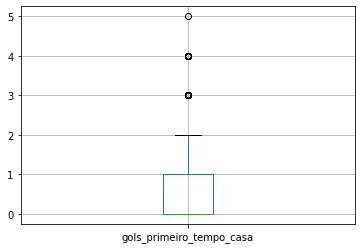

In [9]:
df_features_target.boxplot(column=["gols_primeiro_tempo_casa"])
plt.show()

In [10]:
# Pegando somente os dados (pegando onde se constra 75% dos dados) que refletem a realidade da base.
q3 = df_features_target["gols_primeiro_tempo_casa"].quantile(.75)
q1 = df_features_target["gols_primeiro_tempo_casa"].quantile(.25)
qdiff = q3 - q1
upper_limit = q3 + 1.5 * qdiff
lower_limit = q1 - 1.5 * qdiff
df_features_target_q = df_features_target[(df_features_target["gols_primeiro_tempo_casa"] <= upper_limit) & 
                                          (df_features_target["gols_primeiro_tempo_casa"] >= lower_limit)]

# Removendo linhas com valores faltantes
df_features_target_q = df_features_target_q.loc[(~df_features_target_q["gols_primeiro_tempo_fora"].isna()), 
                                                :]

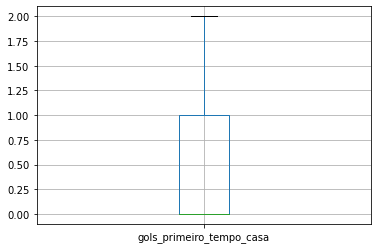

In [11]:
df_features_target_q.boxplot(column=["gols_primeiro_tempo_casa"])
plt.show()

In [12]:
df_features_target_q.isnull().sum()

time_casa                   0
placar_casa                 0
placar_fora                 0
time_fora                   0
estadio                     0
cidade_estado               0
gols_primeiro_tempo_casa    0
gols_primeiro_tempo_fora    0
gols_segundo_tempo_casa     0
gols_segundo_tempo_fora     0
resultado_casa              0
dtype: int64

In [13]:
df_features_target_q.shape

(3150, 11)

## 4 - Ajuste de colunas de texto para numérico

In [14]:
cols_to_normalizer = ["time_casa", 
                      "time_fora", 
#                       "arbitro", 
                      "estadio", 
                      "cidade_estado", 
#                       "periodo", 
                      "resultado_casa"]

for col in cols_to_normalizer:
    df_features_target_q[col] = df_features_target_q[col].astype("category").cat.codes+1

In [15]:
df_features_target_q.head()

,time_casa,placar_casa,placar_fora,time_fora,estadio,cidade_estado,gols_primeiro_tempo_casa,gols_primeiro_tempo_fora,gols_segundo_tempo_casa,gols_segundo_tempo_fora,resultado_casa
104,22,4.0,1.0,2,19,32,1.0,1.0,3.0,0.0,3
136,35,0.0,0.0,10,67,35,0.0,0.0,0.0,0.0,2
312,21,0.0,0.0,11,55,32,0.0,0.0,0.0,0.0,2
320,32,0.0,0.0,25,68,37,0.0,0.0,0.0,0.0,2
327,16,0.0,0.0,29,57,14,0.0,0.0,0.0,0.0,2


## 5 - Observação das correlações

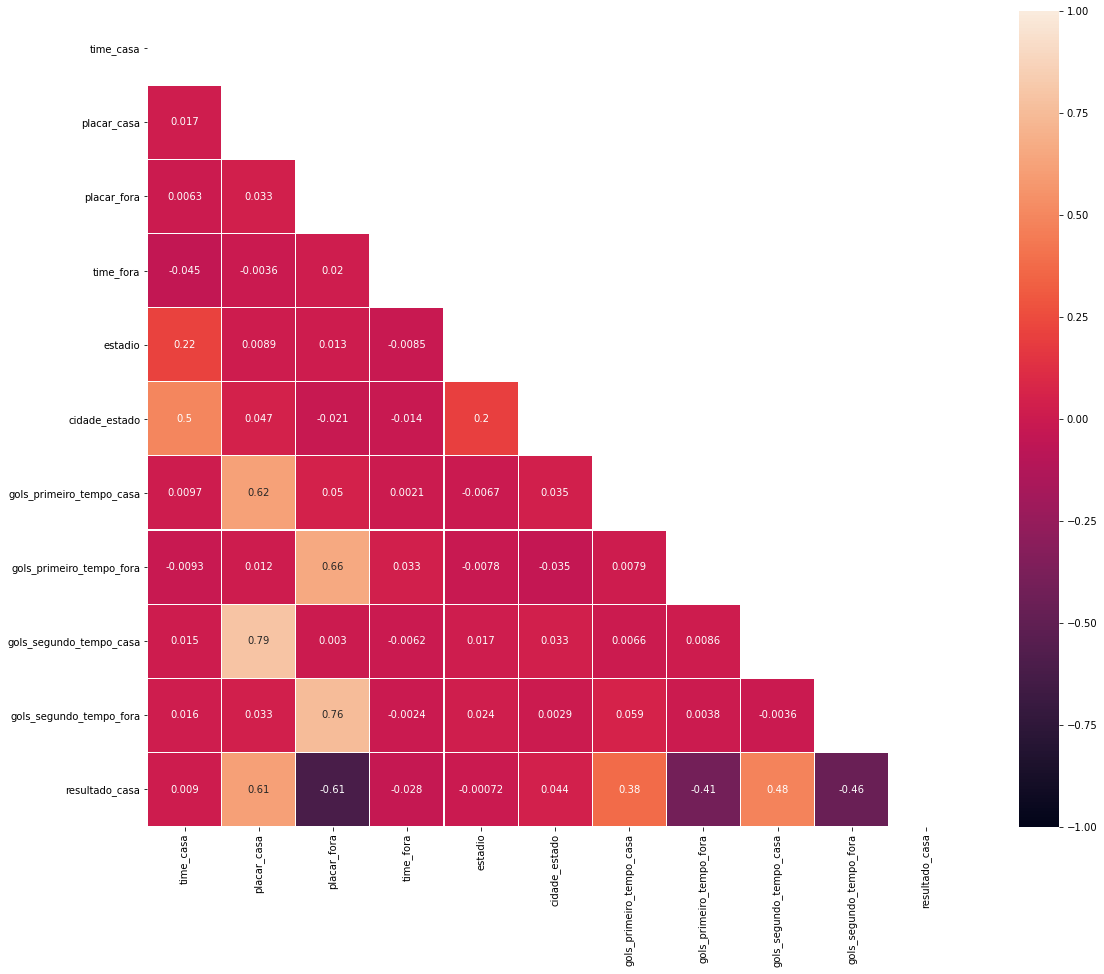

In [16]:
plt.figure(figsize=(20,15))
corr_columns = df_features_target_q.corr()
mask = np.triu(np.ones_like(corr_columns, dtype=bool))
sns.heatmap(corr_columns, mask=mask, cmap="rocket", vmax=1, 
            vmin=-1, square=True, linewidths=.1, annot=True)
plt.show()

## 6 - Separação treino/teste

In [17]:
X = df_features_target_q[df_features_target_q.columns[0:-1]]
y = df_features_target_q['resultado_casa']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 7 - Predições e gráficos

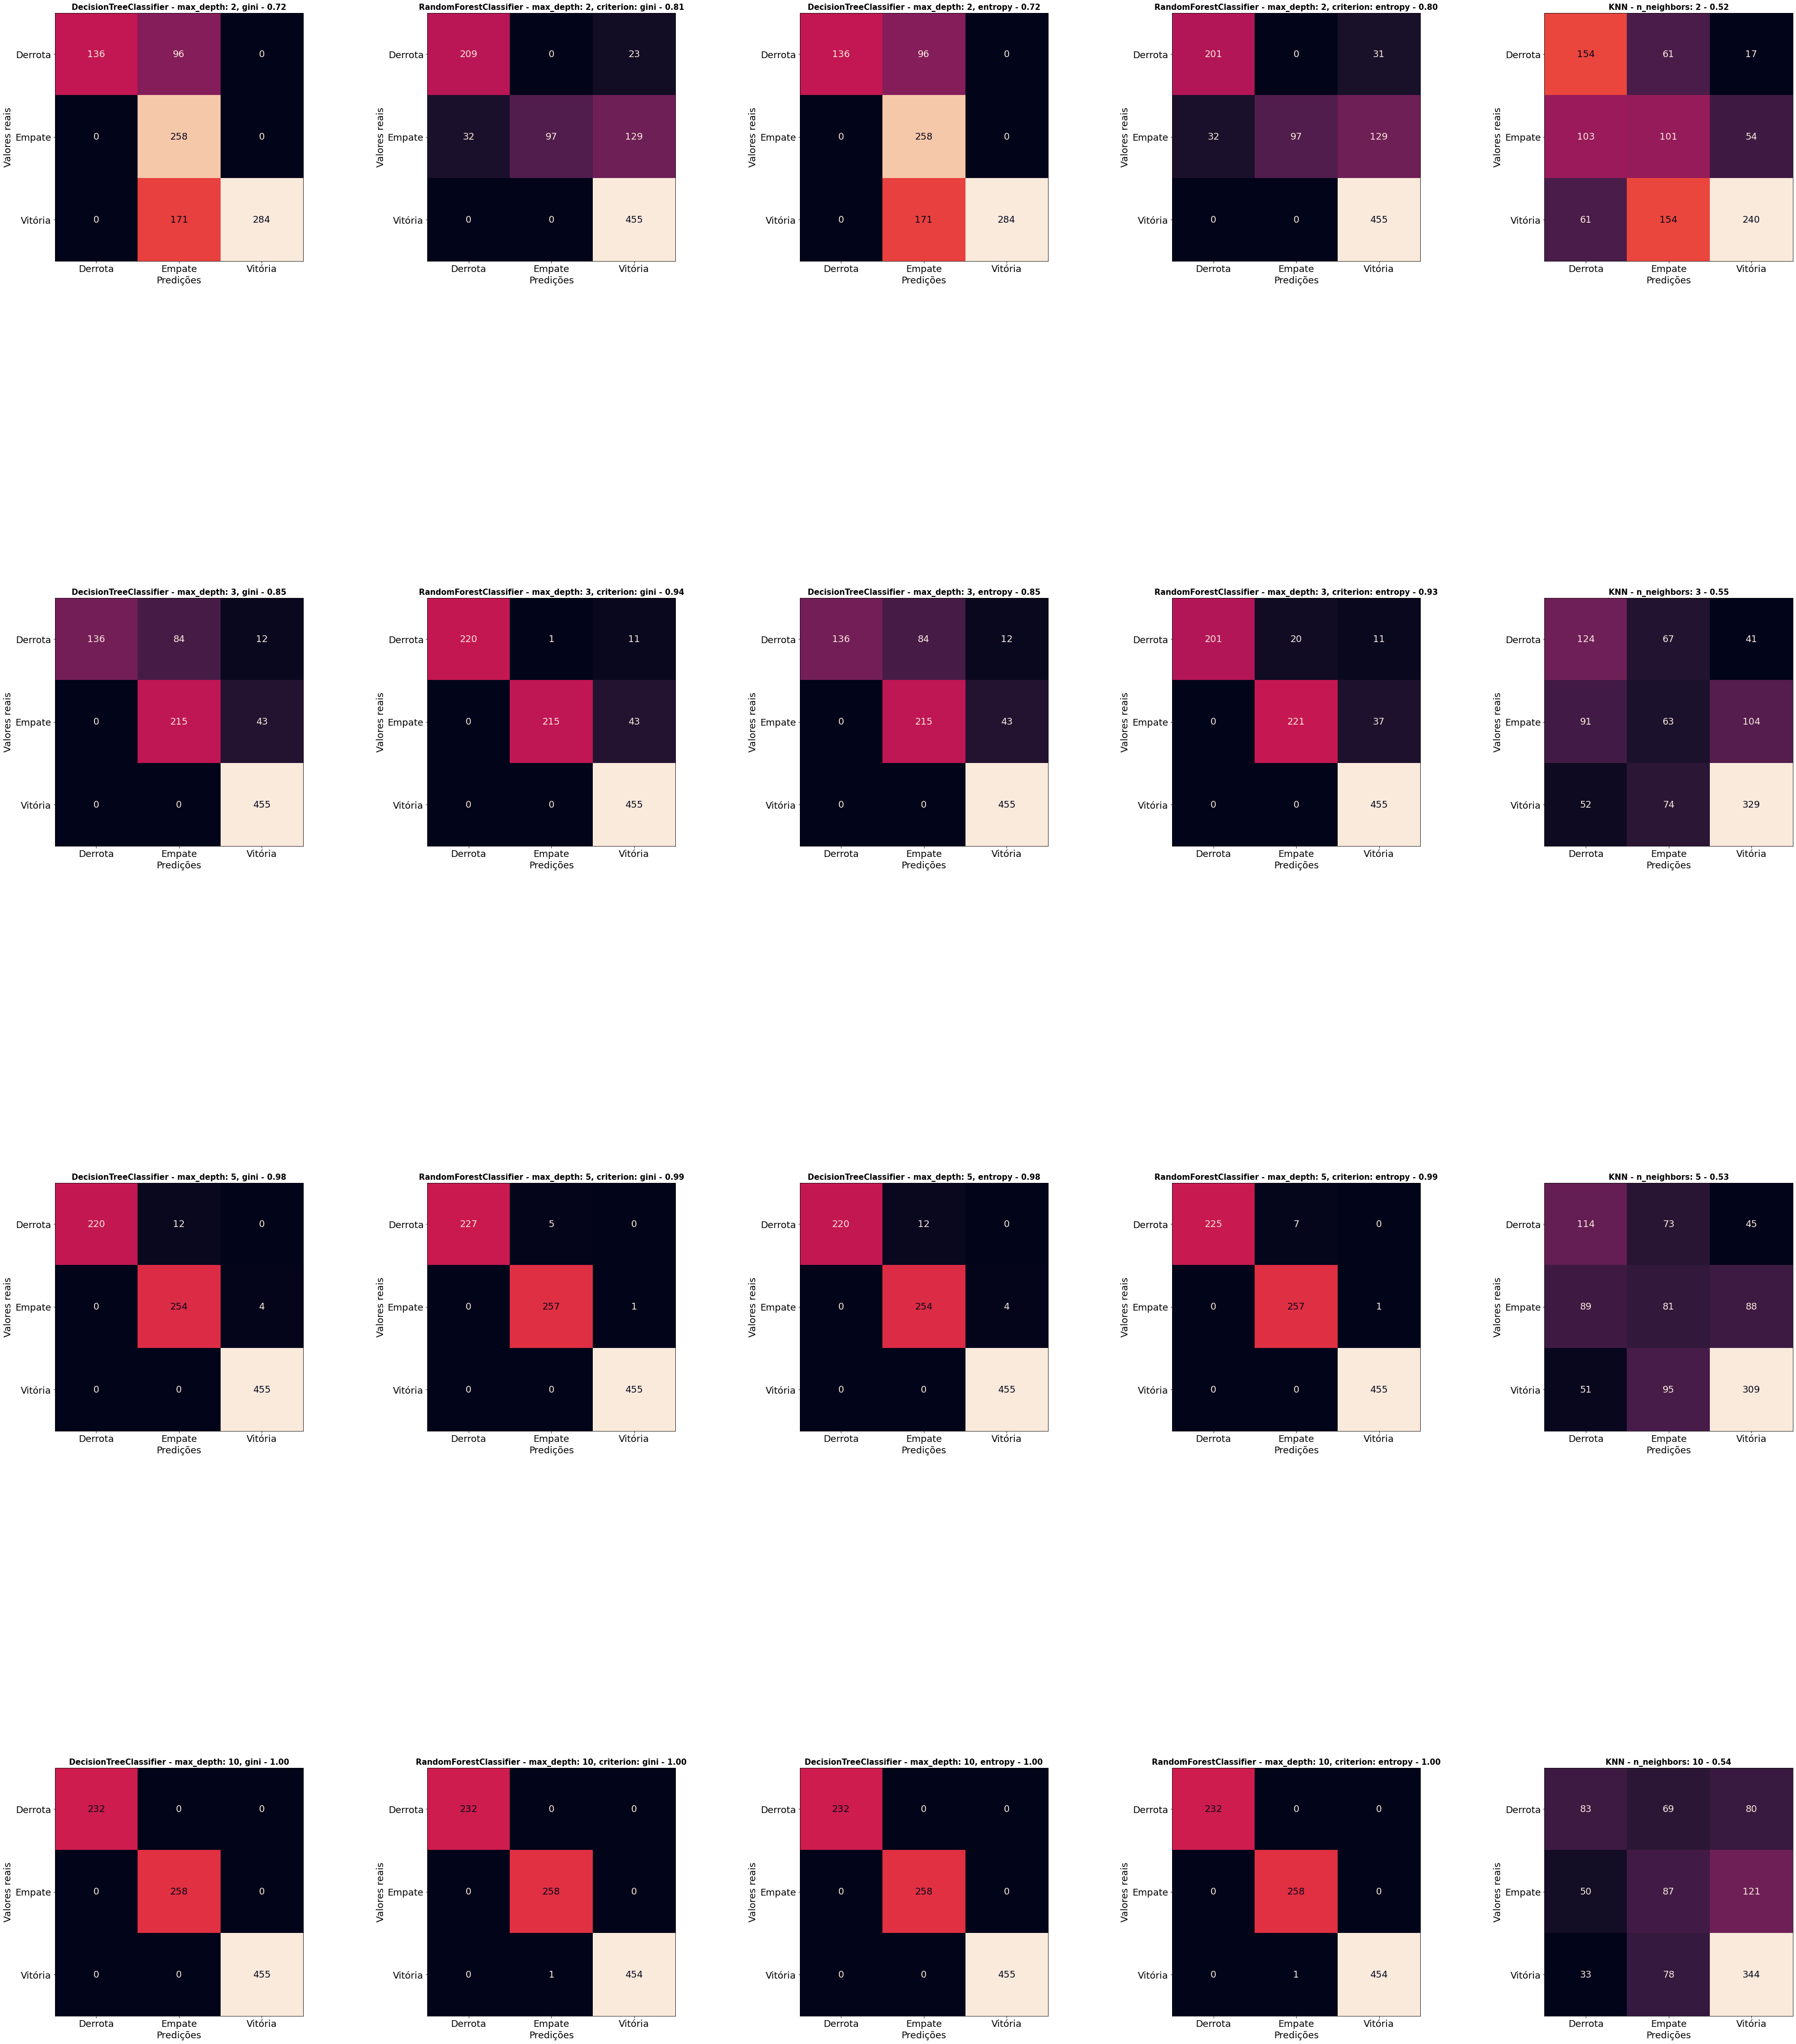

In [19]:
# Listas de diferentes parâmetros
list_max_depth = [2, 3, 5, 10]
list_criterion = ['gini', 'entropy']


# Ajuste do tamanho fonte e de gráficos
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(len(list_max_depth), (len(list_criterion)*2)+1, 
                         figsize=(60, 40), sharey=False)


y_pred_labels = ["Derrota", "Empate", "Vitória"]
reports = []

# Criação dos gráfico utilizando-se dos parâmtros e ajustes realizados acima
for i_max_depth in range(0, len(list_max_depth)):
    for i_criterion in range(0, len(list_criterion)):
        # Predições - DecisionTreeClassifier
        model_decision_tree = DecisionTreeClassifier(criterion=list_criterion[i_criterion],
                                                     max_depth=list_max_depth[i_max_depth], 
                                                     random_state=42)
        model_decision_tree.fit(X_train, y_train)
        y_pred_tree = model_decision_tree.predict(X_test)


        # Métricas - DecisionTreeClassifier
        acc_tree = accuracy_score(y_test, y_pred_tree)
        cm_tree = confusion_matrix(y_test, y_pred_tree)
        report_tree = dict({"model": "DecisionTreeClassifier", 
                            "criterion": list_criterion[i_criterion], 
                            "max_depth_or_n_neighbors": list_max_depth[i_max_depth]}, 
                           **classification_report(y_test, y_pred_tree, 
                                                   target_names=y_pred_labels, output_dict=True))
        reports.append(report_tree)


        # Gráficos - Matriz de confusão e Árvore de decisão
        ax1 = ConfusionMatrixDisplay(confusion_matrix=cm_tree, 
                                     display_labels=y_pred_labels).plot(ax=axes[i_max_depth][i_criterion*2], 
                                                                        cmap="rocket", 
                                                                        colorbar=False)
        
        title_ax1 = f"DecisionTreeClassifier - max_depth: {list_max_depth[i_max_depth]}, {list_criterion[i_criterion]} - {acc_tree:.2f}"
        axes[i_max_depth][i_criterion*2].set_title(title_ax1, fontsize=15, weight='bold')
        axes[i_max_depth][i_criterion*2].set_xlabel('Predições')
        axes[i_max_depth][i_criterion*2].set_ylabel('Valores reais')
        
        
        # Predições - RandomForestClassifier
        model_random_forest = RandomForestClassifier(criterion=list_criterion[i_criterion],
                                                     max_depth=list_max_depth[i_max_depth], 
                                                     random_state=42)
        model_random_forest.fit(X_train, y_train)
        y_pred_random_forest = model_random_forest.predict(X_test)
        
        
        # Métricas - RandomForestClassifier
        acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
        cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
        report_random_forest = dict({"model": "RandomForestClassifier", 
                                     "criterion": list_criterion[i_criterion], 
                                     "max_depth_or_n_neighbors": list_max_depth[i_max_depth]}, 
                                    **classification_report(y_test, y_pred_random_forest, 
                                                            target_names=y_pred_labels, output_dict=True))
        reports.append(report_random_forest)
        
        
        # Gráficos - Matriz de confusão
        ax3 = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest, 
                                     display_labels=y_pred_labels).plot(ax=axes[i_max_depth][(i_criterion*2)+1], 
                                                                        cmap="rocket", 
                                                                        colorbar=False)
        
        title_ax3 = f"RandomForestClassifier - max_depth: {list_max_depth[i_max_depth]}, criterion: {list_criterion[i_criterion]} - {acc_random_forest:.2f}"
        axes[i_max_depth][(i_criterion*2)+1].set_title(title_ax3, fontsize=15, weight='bold')
        axes[i_max_depth][(i_criterion*2)+1].set_xlabel('Predições')
        axes[i_max_depth][(i_criterion*2)+1].set_ylabel('Valores reais')


    # Predições - KNN
    knn = KNeighborsClassifier(n_neighbors=list_max_depth[i_max_depth])
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    # Métricas - KNN
    acc_knn = accuracy_score(y_test, y_pred_knn)
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    report_knn = dict({"model": "KNeighborsClassifier", 
                       "max_depth_or_n_neighbors": list_max_depth[i_max_depth]}, 
                      **classification_report(y_test, y_pred_knn, 
                                              target_names=y_pred_labels, output_dict=True))
    reports.append(report_knn)


    # Gráficos - Matriz de confusão
    ax4 = ConfusionMatrixDisplay(confusion_matrix=cm_knn, 
                                 display_labels=y_pred_labels).plot(ax=axes[i_max_depth][-1], 
                                                                    cmap="rocket", 
                                                                    colorbar=False)
    title_ax4 = f"KNN - n_neighbors: {list_max_depth[i_max_depth]} - {acc_knn:.2f}"
    axes[i_max_depth][-1].set_title(title_ax4, fontsize=15, weight='bold')
    axes[i_max_depth][-1].set_xlabel('Predições')
    axes[i_max_depth][-1].set_ylabel('Valores reais')


# Ajuste e plot do grid de gráficos
plt.subplots_adjust(bottom=4, top=5.5, wspace=0.5, hspace=0.2)
plt.show()

## 8 - Métricas de desempenho

In [20]:
df_reports = pd.json_normalize(reports)

In [21]:
df_reports.sort_values("accuracy", ascending=False).head(20)

,model,criterion,max_depth_or_n_neighbors,accuracy,Derrota.precision,Derrota.recall,Derrota.f1-score,Derrota.support,Empate.precision,Empate.recall,Empate.f1-score,Empate.support,Vitória.precision,Vitória.recall,Vitória.f1-score,Vitória.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support
15,DecisionTreeClassifier,gini,10,1.000000,1.000000,1.000000,1.000000,232,1.000000,1.000000,1.000000,258,1.000000,1.000000,1.000000,455,1.000000,1.000000,1.000000,945,1.000000,1.000000,1.000000,945
17,DecisionTreeClassifier,entropy,10,1.000000,1.000000,1.000000,1.000000,232,1.000000,1.000000,1.000000,258,1.000000,1.000000,1.000000,455,1.000000,1.000000,1.000000,945,1.000000,1.000000,1.000000,945
18,RandomForestClassifier,entropy,10,0.998942,1.000000,1.000000,1.000000,232,0.996139,1.000000,0.998066,258,1.000000,0.997802,0.998900,455,0.998713,0.999267,0.998989,945,0.998946,0.998942,0.998942,945
16,RandomForestClassifier,gini,10,0.998942,1.000000,1.000000,1.000000,232,0.996139,1.000000,0.998066,258,1.000000,0.997802,0.998900,455,0.998713,0.999267,0.998989,945,0.998946,0.998942,0.998942,945
11,RandomForestClassifier,gini,5,0.993651,1.000000,0.978448,0.989107,232,0.980916,0.996124,0.988462,258,0.997807,1.000000,0.998902,455,0.992908,0.991524,0.992157,945,0.993734,0.993651,0.993647,945
13,RandomForestClassifier,entropy,5,0.991534,1.000000,0.969828,0.984683,232,0.973485,0.996124,0.984674,258,0.997807,1.000000,0.998902,455,0.990431,0.988651,0.989420,945,0.991705,0.991534,0.991527,945
10,DecisionTreeClassifier,gini,5,0.983069,1.000000,0.948276,0.973451,232,0.954887,0.984496,0.969466,258,0.991285,1.000000,0.995624,455,0.982058,0.977591,0.979514,945,0.983488,0.983069,0.983039,945
12,DecisionTreeClassifier,entropy,5,0.983069,1.000000,0.948276,0.973451,232,0.954887,0.984496,0.969466,258,0.991285,1.000000,0.995624,455,0.982058,0.977591,0.979514,945,0.983488,0.983069,0.983039,945
6,RandomForestClassifier,gini,3,0.941799,1.000000,0.948276,0.973451,232,0.995370,0.833333,0.907173,258,0.893910,1.000000,0.943983,455,0.963093,0.927203,0.941536,945,0.947655,0.941799,0.941168,945
8,RandomForestClassifier,entropy,3,0.928042,1.000000,0.866379,0.928406,232,0.917012,0.856589,0.885772,258,0.904573,1.000000,0.949896,455,0.940528,0.907656,0.921358,945,0.931397,0.928042,0.927113,945
